# Modificacion de Tablas

Las tablas que tenemos son:
1. Activos: Informacion de cada activo
2. Historico Adjuntos Activos OT: Match de que activo corresponde a que .txt, e informacion de la orden de trabajo fuera del reporte
3. Registros ordenes de Trabajo: Informacion de ordenes de trabajo, incluidas los reportes en formato html

In [1]:
import numpy as np
import pandas as pd
import prettytable as pt

In [3]:
activos = pd.read_csv(r'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\EPM_HISTORICOS_OT_ANDRES_OCAMPO\Activos.csv', delimiter=';')

In [4]:
hist_ots = pd.read_csv(r'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\EPM_HISTORICOS_OT_ANDRES_OCAMPO\Historico Adjuntos Activos OT.csv', delimiter=';')

In [4]:
ots = pd.read_excel('EPM_HISTORICOS_OT_ANDRES_OCAMPO\Registros Ordenes de Trabajo (1).xlsx')

In [5]:
cols = pt.PrettyTable()
cols.add_column('Activos', activos.columns.tolist() + ['', '', ''])
cols.add_column('Hist OTs', hist_ots.columns.tolist()+ [''])
cols.add_column('OTs', ots.columns.tolist())
print(cols)

+---------------+------------------+-------------+
|    Activos    |     Hist OTs     |     OTs     |
+---------------+------------------+-------------+
|    ASSETNUM   |     ASSETNUM     |    WONUM    |
|  DESCRIPTION  |   SLXNUMACTEXT   | DESCRIPTION |
|    ASSETTAG   |  SLXDESCACTEXT   |   ASSETNUM  |
|    LOCATION   |     WORKTYPE     |   WORKTYPE  |
| SLXJDETECNICO |    SLXNUMTOT     |  REPORTDATE |
|  INSTALLDATE  |    SLXDESCOT     |   ACTSTART  |
|     STATUS    | SLXFECCREACIONOT |  ACTFINISH  |
|     SITEID    |  SLXFECINICIOOT  |   PROBLEM   |
|               |   SLXFECFINOT    |    CAUSE    |
|               |     DOCUMENT     |    REMEDY   |
|               |                  |   WORKLOG   |
+---------------+------------------+-------------+


# Agregamos a la tabla de Historico de ordenes de trabajo el Reporte en texto libre correspondiente

In [6]:
# Modificaciones al nombre de archivo para asegurar que sea como el del txt
hist_ots['DOCUMENT'] = hist_ots['DOCUMENT'].replace('ISTORIA', 'istoria', regex = True)
hist_ots['DOCUMENT'] = hist_ots['DOCUMENT'].apply(str.strip)

In [7]:
#Creamos una columna vacia por ahora
hist_ots['WORKLOG'] = ''

for i in range(len(hist_ots.DOCUMENT)):
    filename = hist_ots.DOCUMENT[i]         # Leemos el nombre de archivo para cada una
    
    try:
        lineas = []                             # Lista vacía para guardar el contenido
        with open (f'EPM_HISTORICOS_OT_ANDRES_OCAMPO\HISTORICOS_OT\{filename}.txt', 'rt') as worklog:  # Abre el .txt
            for linea in worklog:               # Lee linea por linea
                lineas.append(linea)            # Guarda la linea como elemento de la lista
        
        worklog = ''.join(lineas)               # Juntamos en un string

        hist_ots.WORKLOG[i] = worklog           # Asignamos el worklog a la entrada correspondiente

    except:
        i =+ 1 


<ipython-input-7-e20a81f7d96f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_ots.WORKLOG[i] = worklog           # Asignamos el worklog a la entrada correspondiente


In [9]:
# Reemplazamos los caracteres \n (new line) con espacios
hist_ots['WORKLOG'] = hist_ots['WORKLOG'].replace('\n', ' ', regex = True)

In [10]:
# Volvemos NA lo que quedo vacío
vacio_a_na = {'': np.nan}
hist_ots['WORKLOG'] = hist_ots['WORKLOG'].replace(vacio_a_na)

In [11]:
# Miramos la cantidad de vacios
hist_ots.WORKLOG.isna().sum()

9908

In [12]:
# Comparamos con los vacios del repositorio, con una muestra random de la mitad:
vacios = ['HistoriaJDE_OT_3815495.txt',
          'HistoriaJDE_OT_3816996.txt',
          'HistoriaJDE_OT_3818147.txt',
          'HistoriaJDE_OT_3818153.txt',
          'HistoriaJDE_OT_3821964.txt',
          'HistoriaJDE_OT_3824321.txt',
          'HistoriaJDE_OT_3824493.txt',
          'HistoriaJDE_OT_3825889.txt',
          'HistoriaJDE_OT_3826393.txt',
          'HistoriaJDE_OT_3829275.txt',
          'HistoriaJDE_OT_3832219.txt',
          'HistoriaJDE_OT_3834917.txt']

In [13]:
hist_ots.loc[hist_ots.DOCUMENT.isin(vacios)]

,ASSETNUM,SLXNUMACTEXT,SLXDESCACTEXT,WORKTYPE,SLXNUMTOT,SLXDESCOT,SLXFECCREACIONOT,SLXFECINICIOOT,SLXFECFINOT,DOCUMENT,WORKLOG


Segun el repositorio, hay 1301 vacios, que parece que no estaban en la tabla. Y parece que hay 9908 en la tabla que no coinciden con ningun .txt. 

(Total de archivos .txt - vacios) = (Total del filas del data frame - NaN en la columna de worklog)?

In [14]:
import os
import glob

#Obtenemos el total de los archivos
files = os.listdir('EPM_HISTORICOS_OT_ANDRES_OCAMPO\HISTORICOS_OT')

(len(files) - 1301) == (len(hist_ots.DOCUMENT) - 9908)

False

In [15]:
# Archivos con info en la carpeta
len(files) - 1301

53063

In [16]:
# Archivos con info en la tabla modificada
len(hist_ots.DOCUMENT) - 9908

48483

Segun esto hay unos 5k .txt que no estan en la tabla? 

In [17]:
#miramos los 9k que si estan pero no tienen .txt
hist_ots.DOCUMENT.loc[hist_ots.WORKLOG.isna()]

0        HistoriaJDE_01312033_OT_1000740
1        HistoriaJDE_01312033_OT_1001233
2        HistoriaJDE_01312033_OT_1001382
3        HistoriaJDE_01312033_OT_1001383
4        HistoriaJDE_01312033_OT_1001386
                      ...               
9903      HistoriaJDE_01312033_OT_999471
9904      HistoriaJDE_01312033_OT_999472
9905      HistoriaJDE_01312033_OT_999570
9906       HistoriaJDE_01312033_OT_99991
46883             HistoriaJDE_OT_3641553
Name: DOCUMENT, Length: 9908, dtype: object

In [19]:
faltantes = hist_ots.DOCUMENT.loc[hist_ots.WORKLOG.isna()]

good_docs = []
for doc in faltantes:
    if len(doc) < 27: good_docs.append(doc)

In [20]:
good_docs

['HistoriaJDE_OT_3641553']

In [21]:
# Parece que solo se está saltando ese por x o y motivo, lo agregamos y ya
hist_ots.WORKLOG.loc[hist_ots.DOCUMENT == 'HistoriaJDE_OT_3641553'] = 'Fecha: Noviembre 15/2017 Programo: Daniel Palacios O.Ejecuto: Jairo Torres y Frank Córdoba. Se realiza inspección y limpieza al barraje de salida, se realiza inspección y mantenimiento a mallas separadoras del barraje, baquelitas separadoras de barras, conexiones entre barras y estado del aislamiento, también se revisan el estado de los CTLs, de sus conexiones eléctricas en el tablero +CCCTS. Trabajo ejecutado por: Jairo Torres y Frank Córdoba. XE: LIMPIAR E INSPECCIONAR BARRAJE ESTATOR GENERADOR UNIDAD'


C:\Users\USER\anaconda3\envs\DS4A\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
hist_ots.WORKLOG.isna().sum()

9907

In [23]:
# Todos los nombres de nuestros .txt son de 26 caracteres, miramos que no haya quedado ninguno de esos sin worklog en la tabla
set(hist_ots.DOCUMENT.loc[hist_ots.WORKLOG.isna()].apply(len))

{29, 30, 31}

In [64]:
# ahora si, guardo el csv
hist_ots.to_csv('historico_OTs_texto_libre.csv')


# Quitamos las tag html de la tabla de Historico reciente de OTs

In [24]:
import html2text

In [25]:
ots['WORKLOG'] = ots['WORKLOG'].apply(html2text.html2text)

In [26]:
# Reemplazamos los caracteres \n (new line) con espacios
ots['WORKLOG'] = ots['WORKLOG'].replace('\n', ' ', regex = True)

In [27]:
ots.head()

,WONUM,DESCRIPTION,ASSETNUM,WORKTYPE,REPORTDATE,ACTSTART,ACTFINISH,PROBLEM,CAUSE,REMEDY,WORKLOG
0,81187,R/V SOFTWARE SCADA LA TASAJERA,2977213,CPROG,2018-07-17 09:13:14.999,2018-08-01 10:58:12.000,2018-12-20 08:25:17.999,CONTROL DEFICIENTE,CABLE DE PUESTA A TIERRA SUELTO,CONECTAR,AJUSTE DE LA HORA EN SCADA. Lo primero que se...
1,81011,LAVAR JUEGO DE PLACAS,2976926,CPROG,2018-07-17 07:35:10.999,2018-07-16 06:59:59.999,2018-07-17 10:20:17.999,OBSTRUCCION,ELEMENTOS EXTRANOS O CONTAMINANTES EN EL FLUIDO,LIMPIAR,** JUL 16/2018 OT: 81011 PROGRAMO: WPARRAR EJ...
2,82516,R/P REPARAR VALVULA MANUAL DEL BY-PASS,2976936,CINME,2018-07-18 15:06:53.999,2018-11-26 06:59:59.999,2018-11-26 12:59:59.999,RETORNO NO ACCIONADO,FUGA,REPARAR,SOLICITANTE: REPARAR LA VALVULA MANUAL DE GUA...
3,82567,REPARAR AGUJAS DE REPUESTO,2976937,CINME,2018-07-18 15:50:47.999,2018-07-18 15:50:47.999,2020-12-04 10:44:12.000,"DANO EN RECUBRIMIENTO, ABOLLADURA, DEFORMACION","DESPLAZAMIENTO DEL TERRENO, DESLIZAMIENTO, ERO...",REPARAR,**JUL 18/2018 OT: 82567 PROGRAMO: WPARRAR EJEC...
4,83539,CORREGIR FUGA DE ACEITE CGI - U1,2976933,CINME,2018-07-19 14:43:19.999,2018-07-19 14:43:21.000,2018-08-08 10:42:17.000,FUGA,"FALLA EN ACCESORIO (VALVULA, SELLO, EMPAQUE, B...",CAMBIAR,SOLICITANTE: CORREGIR FUGA DE ACEITE EN EL CO...


In [71]:
# Guardo el csv
ots.to_csv('historico_OTs_recientes.csv')

# Tabla que relacione activo, fecha y reporte

In [50]:
viejos = hist_ots[['ASSETNUM','SLXNUMTOT','SLXFECINICIOOT','SLXFECFINOT','WORKLOG']]
nuevos = ots[['ASSETNUM','WONUM','ACTSTART','ACTFINISH','WORKLOG']]

In [51]:
viejos['ANTIGUEDAD'] = 'Antiguo'
nuevos['ANTIGUEDAD'] = 'Reciente'

<ipython-input-51-4f60f7d8b802>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viejos['ANTIGUEDAD'] = 'Antiguo'
<ipython-input-51-4f60f7d8b802>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevos['ANTIGUEDAD'] = 'Reciente'


In [52]:
viejos = viejos.rename(columns={'SLXNUMTOT': 'WONUM','SLXFECINICIOOT': 'ACTSTART','SLXFECFINOT':'ACTFINISH'})

In [53]:
viejos['ACTSTART'] = pd.to_datetime(viejos['ACTSTART'])
viejos['ACTFINISH'] = pd.to_datetime(viejos['ACTFINISH'])
viejos['ASSETNUM'] = viejos['ASSETNUM'].astype('object')

nuevos['ACTSTART'] = pd.to_datetime(nuevos['ACTSTART'])
nuevos['ACTFINISH'] = pd.to_datetime(nuevos['ACTFINISH'])
nuevos['ASSETNUM'] = nuevos['ASSETNUM'].astype('object')

<ipython-input-53-5446672fd909>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevos['ACTSTART'] = pd.to_datetime(nuevos['ACTSTART'])
<ipython-input-53-5446672fd909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevos['ACTFINISH'] = pd.to_datetime(nuevos['ACTFINISH'])
<ipython-input-53-5446672fd909>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [54]:
todos = viejos.append(nuevos)
todos = todos.sort_values(by = ['ASSETNUM', 'ACTSTART'])

In [55]:
todos.head()

,ASSETNUM,WONUM,ACTSTART,ACTFINISH,WORKLOG,ANTIGUEDAD
9612,2976773.0,93702,2001-03-23 00:00:00.000,2001-03-23 00:00:00,NaN,Antiguo
2982,2976773.0,2192875,2012-11-16 00:00:00.000,2012-11-16 00:00:00,NaN,Antiguo
1053,2976774.0,1361312,2009-02-27 00:00:00.000,2009-02-27 00:00:00,NaN,Antiguo
8676,2976775,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24,10/03/2020 Se verifica el funcionamiento del ...,Reciente
10687,2976775,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24,REVISAR ARCHIVO ADJUNTO.,Reciente


In [49]:
todos.to_csv('relacion_ots_activo.csv')

# Visualizaciones

In [80]:
activos = pd.read_csv(r'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\EPM_HISTORICOS_OT_ANDRES_OCAMPO\Activos.csv', delimiter=';')
hist_ots = pd.read_csv(r'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\EPM_HISTORICOS_OT_ANDRES_OCAMPO\Historico Adjuntos Activos OT.csv', delimiter=';')
ots = pd.read_excel(r'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\EPM_HISTORICOS_OT_ANDRES_OCAMPO\Registros Ordenes de Trabajo (1).xlsx')
todos = pd.read_csv(r'relacion_ots_activo.csv')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
hist_ots.head()

,ASSETNUM,SLXNUMACTEXT,SLXDESCACTEXT,WORKTYPE,SLXNUMTOT,SLXDESCOT,SLXFECCREACIONOT,SLXFECINICIOOT,SLXFECFINOT,DOCUMENT
0,2977237.0,2879,CIRCUITOS ALUMBRADO C/M TS-ALUMBRADO TOMAS 220...,MP,1000740,REVISION GENERAL,14/2/2007,14/2/2007,14/2/2007,HISTORIAJDE_01312033_OT_1000740
1,2976789.0,2878,CIRCUITOS ALUMBRADO C/V TS-ALUMBRADO TOMAS 480...,MP,1001233,REVISION GENRAL,15/2/2007,15/2/2007,15/2/2007,HISTORIAJDE_01312033_OT_1001233
2,NaN,2907,INTERCAMBIADOR PLACAS 2 U1 TS-MARCA ALFA-LAVA-...,MP,1001382,LAVAR INT PLACAS 2 U1 TS,16/2/2007,16/2/2007,16/2/2007,HISTORIAJDE_01312033_OT_1001382
3,2977052.0,3069,TABLERO TURBINA U2 TS-MARCA NEYRPIC---,CPROG,1001383,MALA SEÑALIZ TABL TURB U1 TS,16/2/2007,16/2/2007,16/2/2007,HISTORIAJDE_01312033_OT_1001383
4,2977266.0,2955,MOTOBOMBA 2 AGUA FRIA TS-MARCA SIHI-HALB-SISTE...,CPROG,1001386,FUGA AGUA PRENSOEST AFFA-2 TS,16/2/2007,16/2/2007,16/2/2007,HISTORIAJDE_01312033_OT_1001386


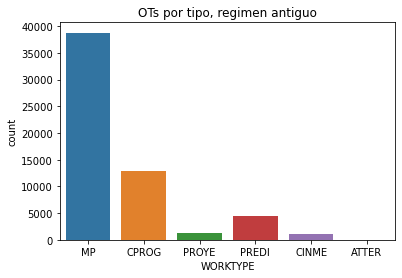

In [53]:
sns.countplot(x = hist_ots.WORKTYPE)
plt.title('OTs por tipo, regimen antiguo')
plt.show();

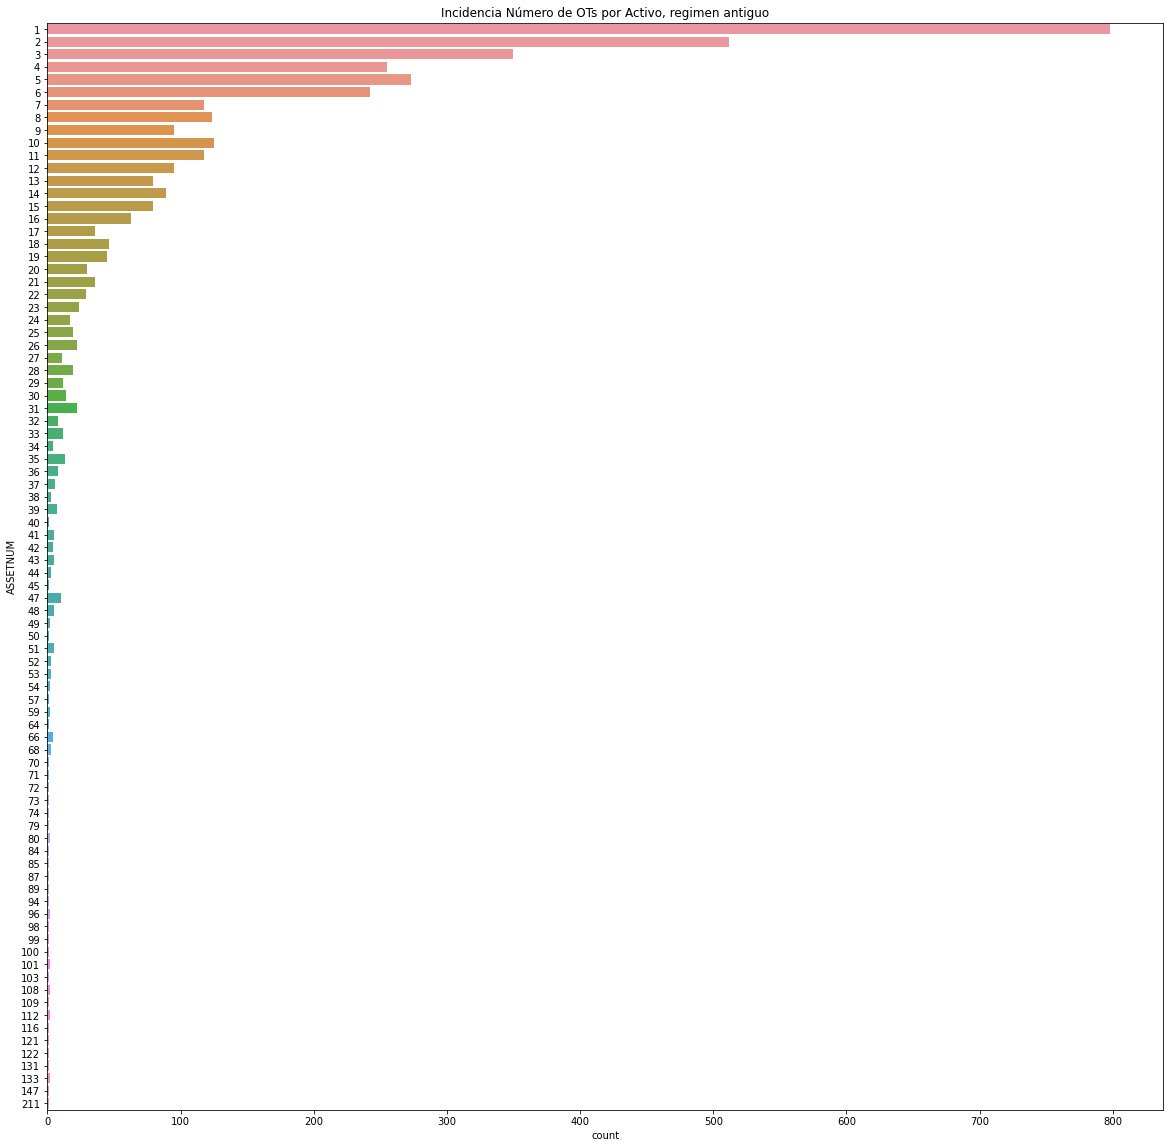

In [62]:
plt.figure(figsize = (20, 20))
sns.countplot(y = pd.DataFrame(hist_ots.ASSETNUM.value_counts()).ASSETNUM)
plt.title('Incidencia Número de OTs por Activo, regimen antiguo')
#plt.xticks(rotation = 90)
plt.show();

In [70]:
by_date = pd.DataFrame(hist_ots.SLXFECCREACIONOT.value_counts())
by_date['date'] = by_date.index
by_date['date'] = pd.to_datetime(by_date['date'])
by_date.sort_values(by = 'date', inplace = True)

,SLXFECCREACIONOT,date
3/8/2000,1,2000-03-08
3/11/2000,1,2000-03-11
4/9/2000,3,2000-04-09
5/9/2000,2,2000-05-09
6/9/2000,3,2000-06-09


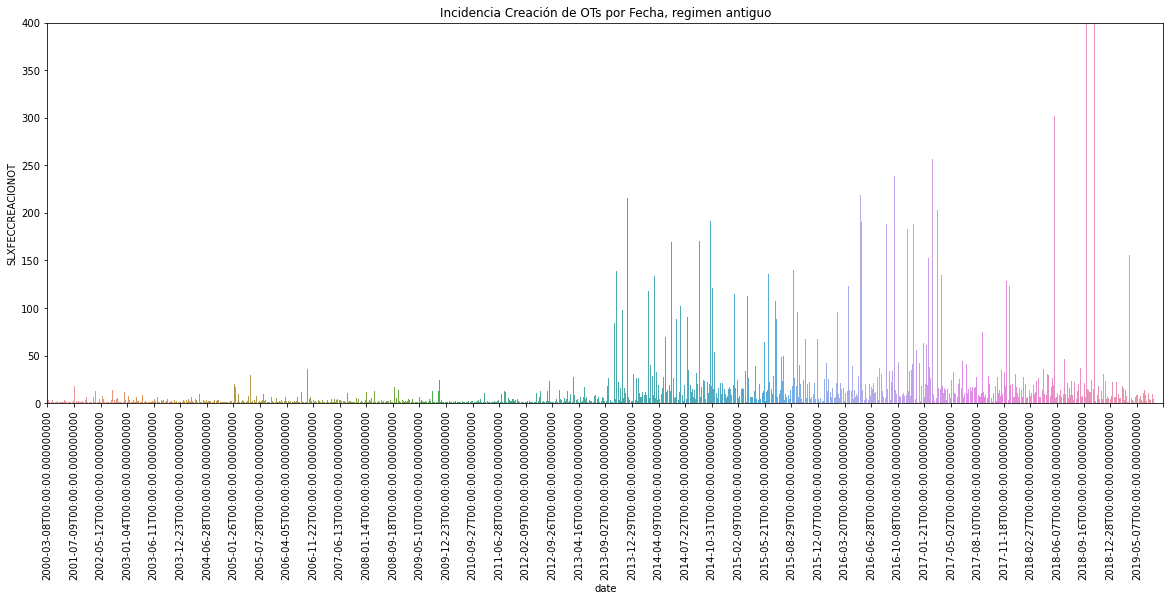

In [79]:
plt.figure(figsize = (20, 7))
sns.barplot(y = 'SLXFECCREACIONOT', x = 'date', data = by_date)
plt.title('Incidencia Creación de OTs por Fecha, regimen antiguo')
plt.xticks(np.arange(4300, step = 100), rotation = 90)
plt.ylim(0,400)
plt.show();

In [81]:
ots.head()

,WONUM,DESCRIPTION,ASSETNUM,WORKTYPE,REPORTDATE,ACTSTART,ACTFINISH,PROBLEM,CAUSE,REMEDY,WORKLOG
0,81187,R/V SOFTWARE SCADA LA TASAJERA,2977213,CPROG,2018-07-17 09:13:14.999,2018-08-01 10:58:12.000,2018-12-20 08:25:17.999,CONTROL DEFICIENTE,CABLE DE PUESTA A TIERRA SUELTO,CONECTAR,<html><div>AJUSTE DE LA HORA EN SCADA.</div><d...
1,81011,LAVAR JUEGO DE PLACAS,2976926,CPROG,2018-07-17 07:35:10.999,2018-07-16 06:59:59.999,2018-07-17 10:20:17.999,OBSTRUCCION,ELEMENTOS EXTRANOS O CONTAMINANTES EN EL FLUIDO,LIMPIAR,"<html><font size=""2""> </font>\n<b>\n <font fa..."
2,82516,R/P REPARAR VALVULA MANUAL DEL BY-PASS,2976936,CINME,2018-07-18 15:06:53.999,2018-11-26 06:59:59.999,2018-11-26 12:59:59.999,RETORNO NO ACCIONADO,FUGA,REPARAR,"<html><font size=""2""><p>SOLICITANTE:</p>\n<p>R..."
3,82567,REPARAR AGUJAS DE REPUESTO,2976937,CINME,2018-07-18 15:50:47.999,2018-07-18 15:50:47.999,2020-12-04 10:44:12.000,"DANO EN RECUBRIMIENTO, ABOLLADURA, DEFORMACION","DESPLAZAMIENTO DEL TERRENO, DESLIZAMIENTO, ERO...",REPARAR,"<html><font color=""#000000"" face=""Times New Ro..."
4,83539,CORREGIR FUGA DE ACEITE CGI - U1,2976933,CINME,2018-07-19 14:43:19.999,2018-07-19 14:43:21.000,2018-08-08 10:42:17.000,FUGA,"FALLA EN ACCESORIO (VALVULA, SELLO, EMPAQUE, B...",CAMBIAR,"<html><font size=""2""><p>SOLICITANTE:</p>\n<p>C..."


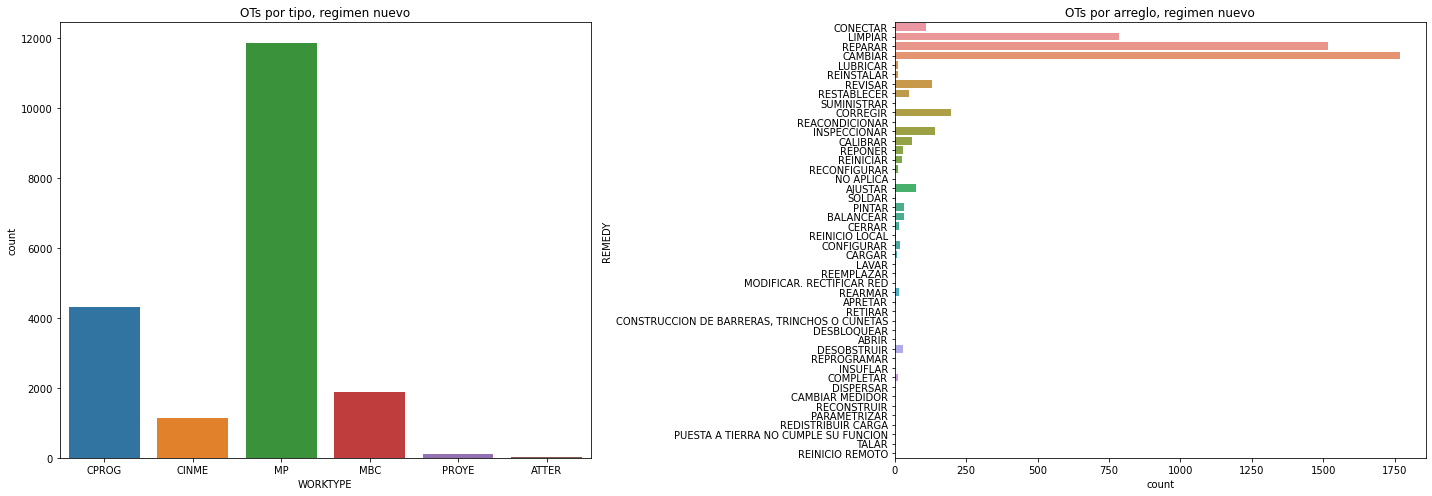

In [87]:
plt.figure(figsize = (20,7))

plt.subplot(121)
sns.countplot(x = ots.WORKTYPE)
plt.title('OTs por tipo, regimen nuevo')

plt.subplot(122)
sns.countplot(y = ots.REMEDY)
plt.title('OTs por arreglo, regimen nuevo')
plt.tight_layout();

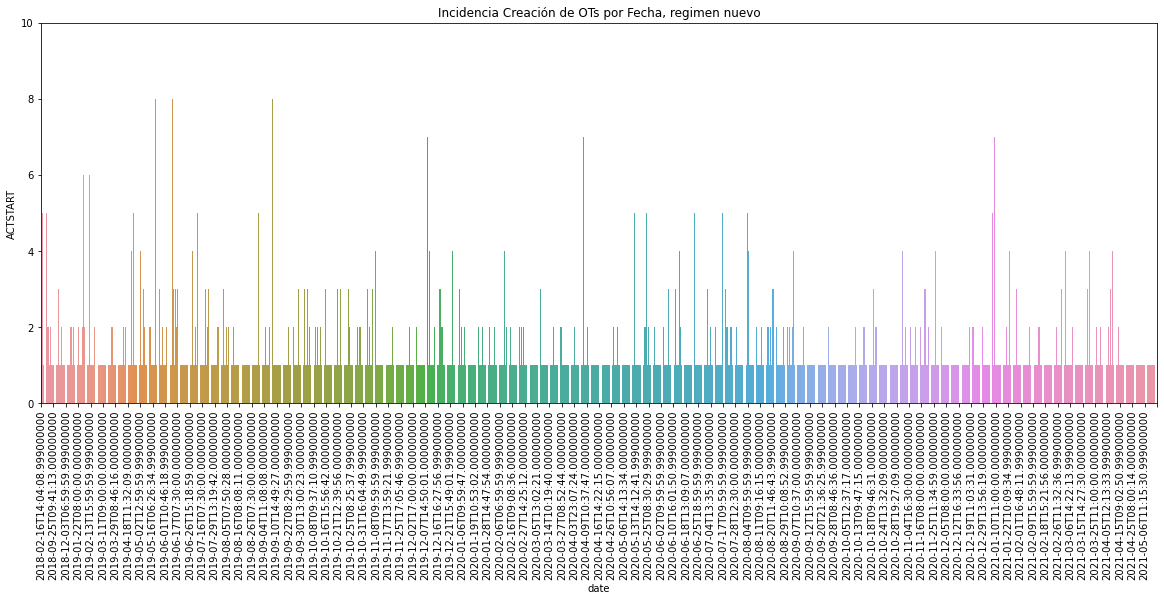

In [92]:
by_date = pd.DataFrame(ots.ACTSTART.value_counts())
by_date['date'] = by_date.index
by_date.sort_values(by = 'date', inplace = True)

plt.figure(figsize = (20, 7))
sns.barplot(y = 'ACTSTART', x = 'date', data = by_date)
plt.title('Incidencia Creación de OTs por Fecha, regimen nuevo')
plt.xticks(np.arange(13600, step = 150), rotation = 90)
plt.ylim(0,10)
plt.show();

In [104]:
ots.PROBLEM = ots.PROBLEM.astype(str)
ots.PROBLEMS = ots.PROBLEM.apply(lambda x: x.split(','))

<ipython-input-104-24ba11d660f8>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ots.PROBLEMS = ots.PROBLEM.apply(lambda x: x.split(','))


In [135]:
all_problems = []
for i in range(len(ots.PROBLEMS)):
	all_problems.append(ots.PROBLEMS[i])
all_problems_flat = [ item for elem in all_problems for item in elem]

from collections import Counter
dict = Counter(all_problems_flat)
problems = pd.DataFrame.from_dict(dict, orient = 'index')
problems.rename(columns = {0: 'Total'}, inplace = True)
problems.drop(index='nan', inplace=True)

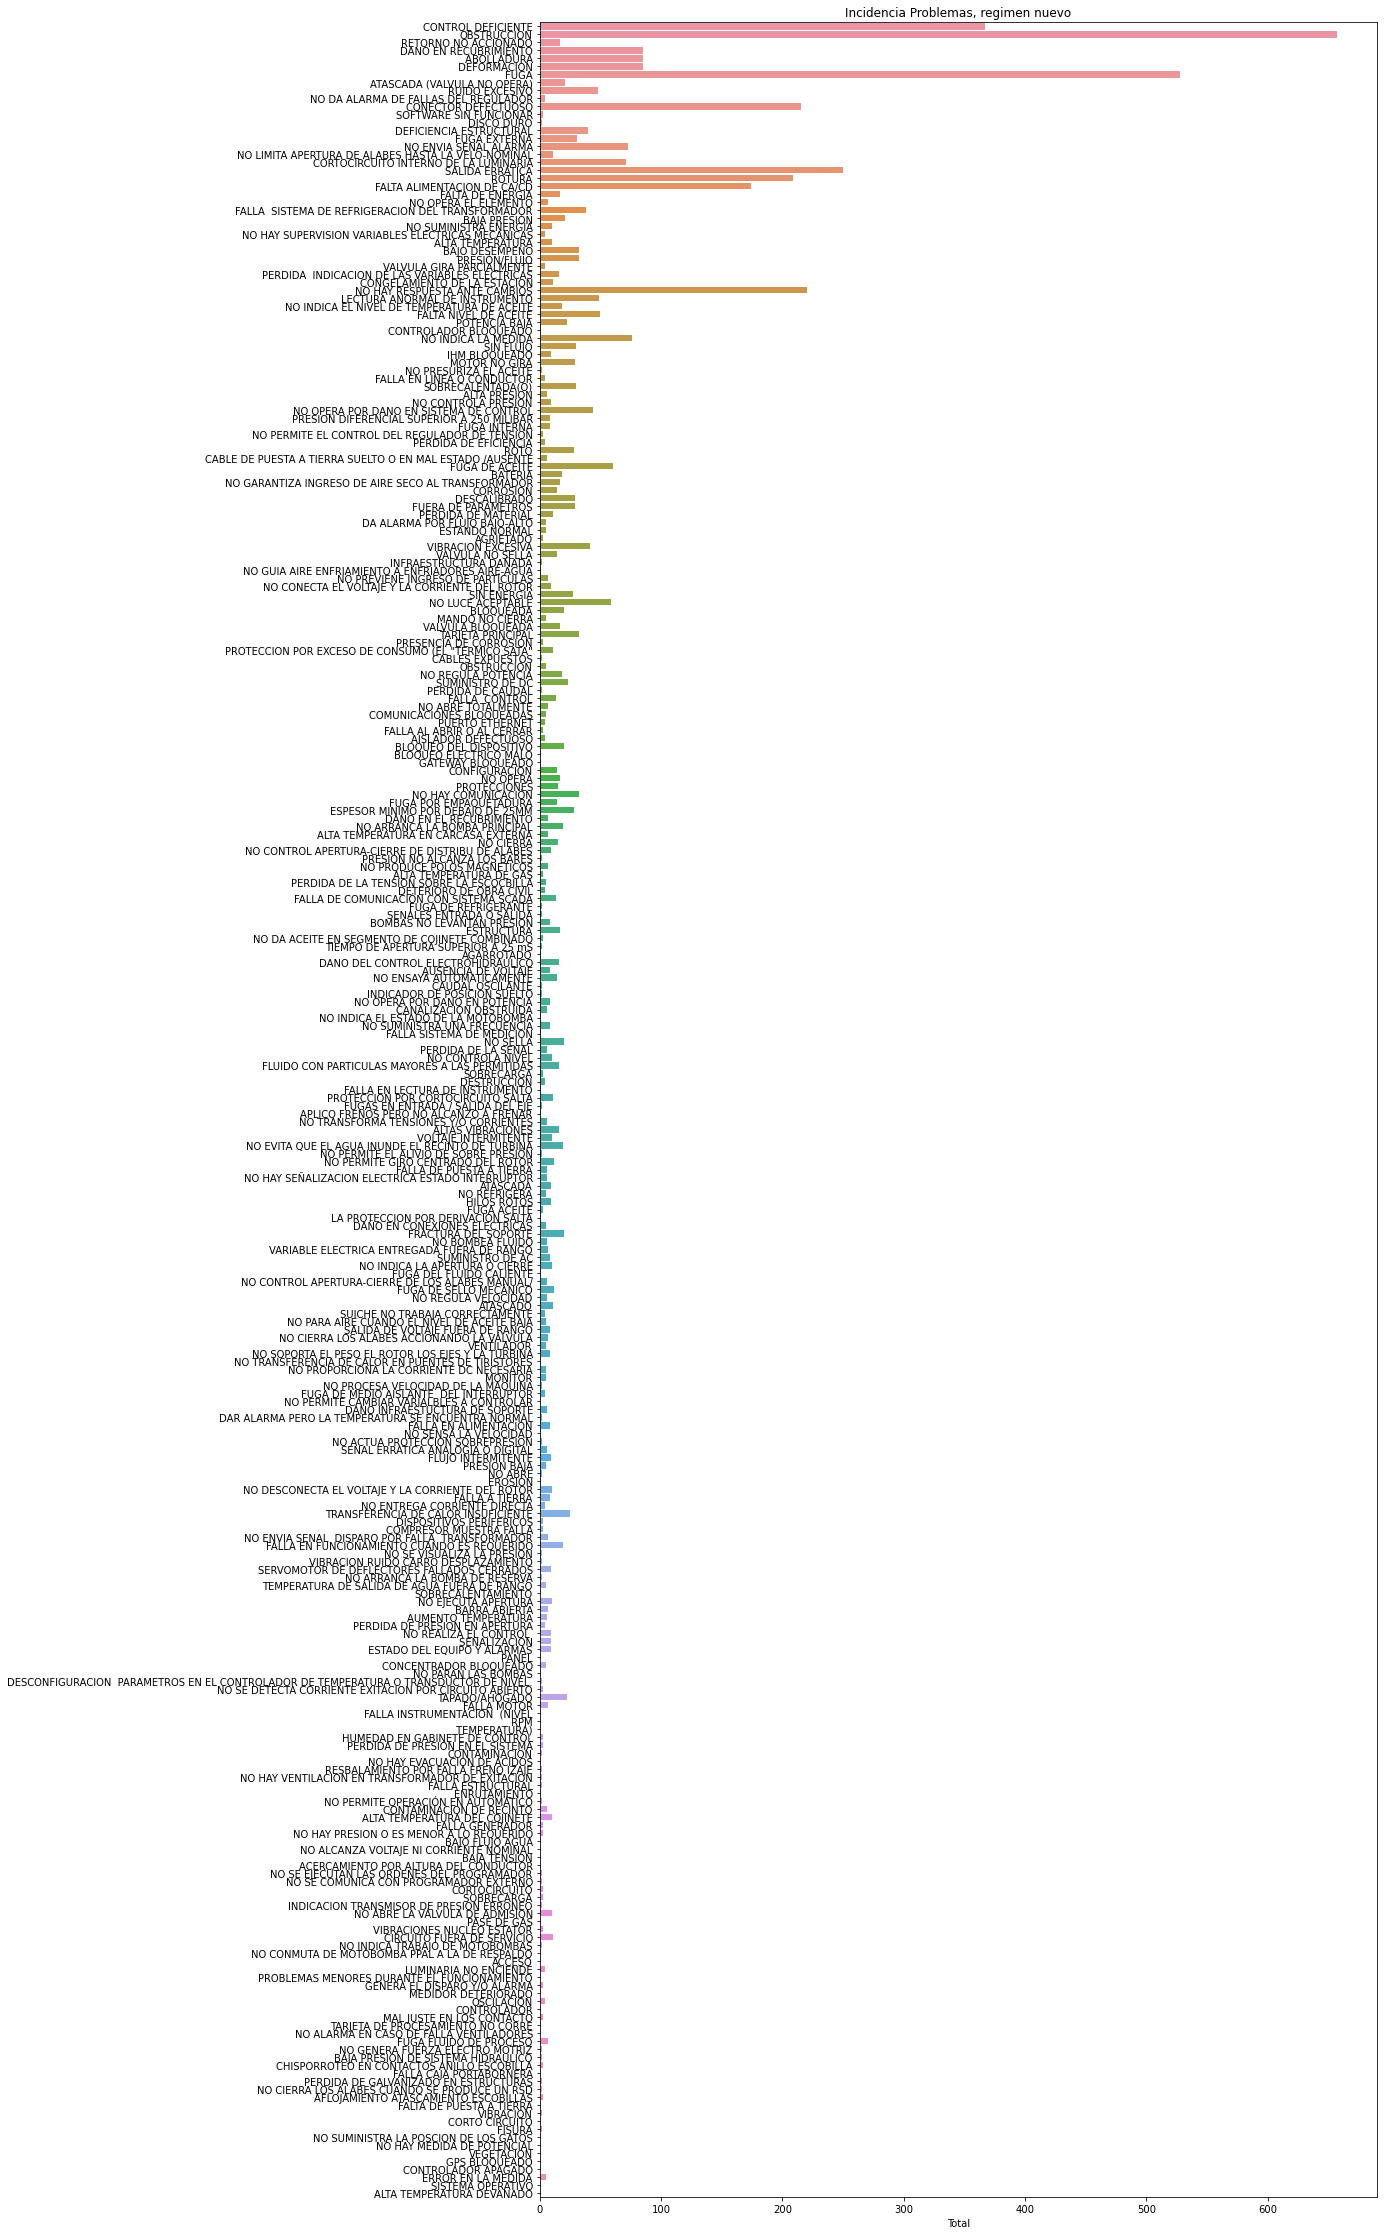

In [136]:
plt.figure(figsize = (15, 40))
sns.barplot(x = problems.Total, y = problems.index, data = problems)
plt.title('Incidencia Problemas, regimen nuevo')
plt.show();

In [137]:
ots.CAUSE = ots.CAUSE.astype(str)
ots.CAUSES = ots.CAUSE.apply(lambda x: x.split(','))

all_causes = []
for i in range(len(ots.CAUSES)):
	all_causes.append(ots.CAUSES[i])
all_causes_flat = [ item for elem in all_causes for item in elem]

#from collections import Counter
dict = Counter(all_causes_flat)
causes = pd.DataFrame.from_dict(dict, orient = 'index')
causes.rename(columns = {0: 'Total'}, inplace = True)
causes.drop(index='nan', inplace=True)

<ipython-input-137-19e74ac96ef9>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ots.CAUSES = ots.CAUSE.apply(lambda x: x.split(','))


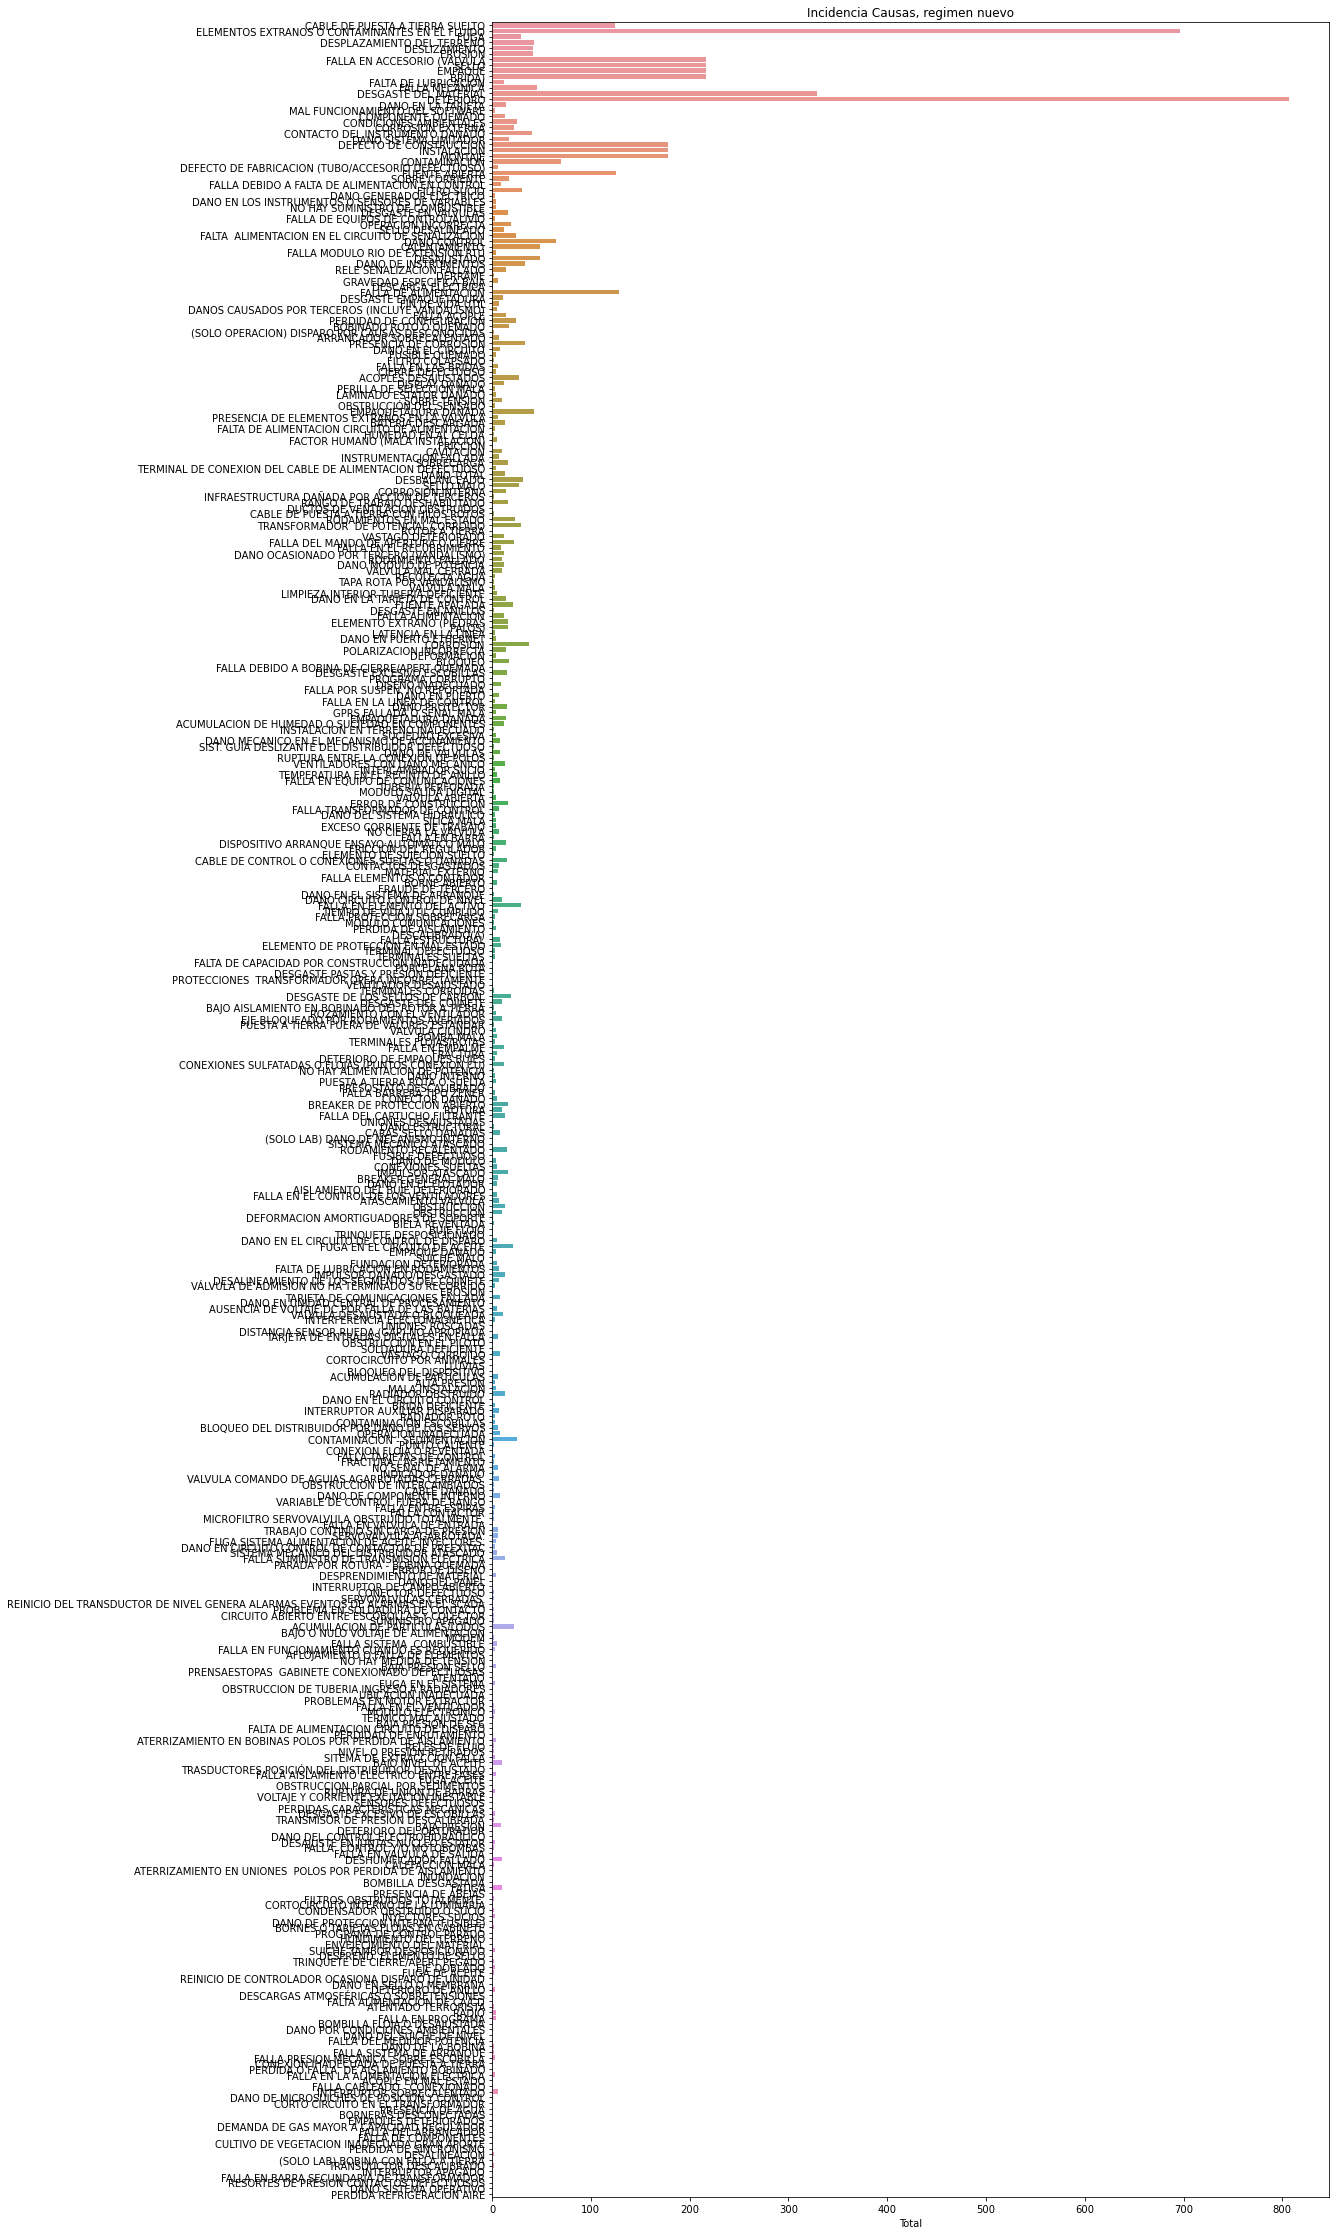

In [138]:
plt.figure(figsize = (15, 50))
sns.barplot(x = causes.Total, y = causes.index, data = causes)
plt.title('Incidencia Causas, regimen nuevo')
plt.show();

In [12]:
todos.head()

,Unnamed: 0,ASSETNUM,WONUM,ACTSTART,ACTFINISH,WORKLOG,ANTIGUEDAD
0,9612,2976773.0,93702,2001-03-23 00:00:00.000,2001-03-23 00:00:00.000,NaN,Antiguo
1,2982,2976773.0,2192875,2012-11-16 00:00:00.000,2012-11-16 00:00:00.000,NaN,Antiguo
2,1053,2976774.0,1361312,2009-02-27 00:00:00.000,2009-02-27 00:00:00.000,NaN,Antiguo
3,8676,2976775.0,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24.000,10/03/2020 Se verifica el funcionamiento del ...,Reciente
4,10687,2976775.0,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24.000,REVISAR ARCHIVO ADJUNTO.,Reciente


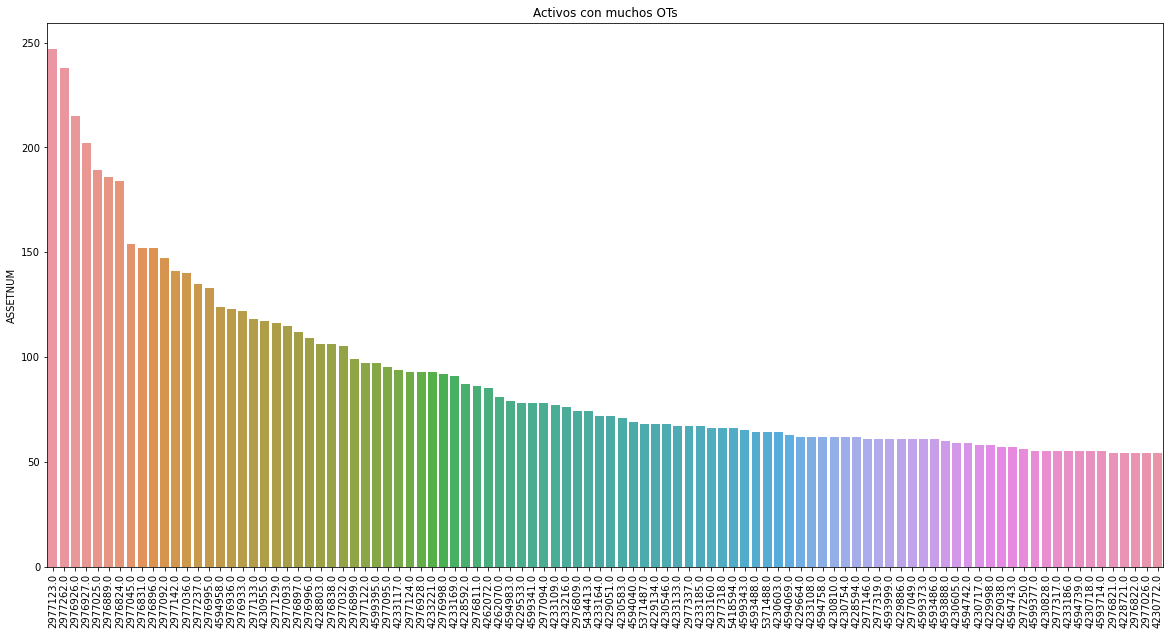

In [159]:
all_assets = pd.DataFrame(todos.ASSETNUM.value_counts())
top100 = all_assets.iloc[:100].copy()

plt.figure(figsize = (20,10))
sns.barplot(x = top100.index, y = top100.ASSETNUM, data=top100, order=top100.index)
plt.title('Activos con muchos OTs')
plt.xticks(rotation = 90);

In [219]:
activos.loc[activos.ASSETNUM == 2976927]

,ASSETNUM,DESCRIPTION,ASSETTAG,LOCATION,SLXJDETECNICO,INSTALLDATE,STATUS,SITEID
2645,2976927,INTERCAMBIADOR DE CALOR DE PLACAS,2 CALOR DE PLACAS,TS_CNV_U1_GEN_AUX_REFRIG,393438.0,1/07/1993,OPERACION,0131_GE


<AxesSubplot:xlabel='count', ylabel='ANTIGUEDAD'>

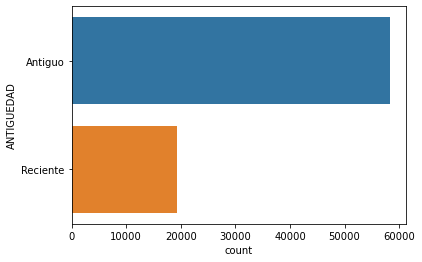

In [162]:
sns.countplot(y = todos.ANTIGUEDAD)

In [165]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
#nltk.download('punkt')
#nltk.download('stopwords')

In [201]:
reports = todos.loc[~(todos.WORKLOG.isna())].copy()

In [207]:
reports['tokenized'] = reports.WORKLOG.apply(lambda x: nltk.tokenize.word_tokenize(x))

In [214]:
for i in range(len(reports.WORKLOG)):
	reports.tokenized[i] = [word for word in reports.tokenized[i] if '1' not in word]
	reports.tokenized[i] = [word for word in reports.tokenized[i] if word not in stopwords]

<ipython-input-214-cd997732912f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reports.tokenized[i] = [word for word in reports.tokenized[i] if '1' not in word]
<ipython-input-214-cd997732912f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reports.tokenized[i] = [word for word in reports.tokenized[i] if word not in stopwords]


In [215]:
reports.head()

,index,Unnamed: 0,ASSETNUM,WONUM,ACTSTART,ACTFINISH,WORKLOG,ANTIGUEDAD,tokenized
0,3,8676,2976775.0,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24.000,10/03/2020 Se verifica el funcionamiento del ...,Reciente,"[Se, verifica, funcionamiento, cargador, bater..."
1,4,10687,2976775.0,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24.000,REVISAR ARCHIVO ADJUNTO.,Reciente,"[REVISAR, ARCHIVO, ADJUNTO, .]"
2,5,13355,2976775.0,4077522,2020-09-24 14:26:33.999,2020-09-24 14:26:37.000,SE REALIZA VISITA A TORRE DE CAPTACION Y SE EN...,Reciente,"[SE, REALIZA, VISITA, A, TORRE, DE, CAPTACION,..."
3,6,15721,2976775.0,4587032,2021-01-14 14:30:06.000,2021-01-14 14:30:09.999,Se realizara la visita a la torre de captación...,Reciente,"[Se, realizara, visita, torre, captación, veri..."
4,7,16462,2976775.0,4587032,2021-01-14 14:30:06.000,2021-01-14 14:30:09.999,Se realiza visita a torre de captación y se ve...,Reciente,"[Se, realiza, visita, torre, captación, verifi..."


In [202]:
reports.reset_index(inplace=True)
for i in range(len(reports.WORKLOG)):
	reports.tokenized[i] = nltk.tokenize.word_tokenize(reports.WORKLOG[i])

AttributeError: 'DataFrame' object has no attribute 'tokenized'